In [17]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
data_dir = "/home/ucsd-train02/projects/single_cell_intestine/results/"

In [4]:
filtered_counts = pd.read_csv(data_dir+"counts_filtered.csv", index_col=0)
print(filtered_counts.shape)
filtered_counts.head()

(5355, 1385)


,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,B1_AAACCGTGCCAAGT_Tuft,B1_AAACGCACAGCCTA_Goblet,B1_AAACGCACCAGATC_Endocrine,B1_AAACGCACCGCCTT_Stem,B1_AAACGCACCGTAGT_Stem,B1_AAACGGCTGATAGA_TA.Early,B1_AAACTTGAAGAGTA_Enterocyte.Mature.Proximal,B1_AAACTTGACCACAA_TA.G1,B1_AAAGACGATTGTCT_Enterocyte.Mature.Proximal,...,B1_TTTAGAGAACGGAG_Enterocyte.Immature.Distal,B1_TTTAGAGAGGAAAT_Stem,B1_TTTAGGCTCTCTTA_Paneth,B1_TTTCACGAAGTGTC_TA.Early,B1_TTTCACGACACACA_Enterocyte.Progenitor.Early,B1_TTTCACGAGAGGCA_Stem,B1_TTTCCAGAACGCTA_Goblet,B1_TTTCCAGATGCAAC_Enterocyte.Progenitor,B1_TTTCGAACTACTGG_Stem,B1_TTTCTACTTCACCC_Enterocyte.Progenitor.Late
Mrpl15,2,1,2,2,0,4,0,1,4,0,...,0,3,1,1,0,4,2,3,0,3
Lypla1,2,0,0,1,0,0,0,0,1,0,...,0,1,0,1,0,0,3,0,0,3
Tcea1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,2,0,1
Atp6v1h,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Rb1cc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0


**First we will scale the counts for sequencing depth**

Do we need a length normalization here? Why or why not? 

Scaling for sequencing depth: Divide each count by the total reads in that libary and multiply by some scaling factor (so we aren't dealing with tiny tiny numbers). In this case, we will use 10000 as the scaling factor. 

In [8]:
#Use sum to get the total sequencing depth per cell

filtered_counts.sum().head()

B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal    5879
B1_AAACCGTGCCAAGT_Tuft                          2726
B1_AAACGCACAGCCTA_Goblet                        7517
B1_AAACGCACCAGATC_Endocrine                     8071
B1_AAACGCACCGCCTT_Stem                          6518
dtype: int64

In [12]:
((filtered_counts/filtered_counts.sum())*10000).head()

,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,B1_AAACCGTGCCAAGT_Tuft,B1_AAACGCACAGCCTA_Goblet,B1_AAACGCACCAGATC_Endocrine,B1_AAACGCACCGCCTT_Stem,B1_AAACGCACCGTAGT_Stem,B1_AAACGGCTGATAGA_TA.Early,B1_AAACTTGAAGAGTA_Enterocyte.Mature.Proximal,B1_AAACTTGACCACAA_TA.G1,B1_AAAGACGATTGTCT_Enterocyte.Mature.Proximal,...,B1_TTTAGAGAACGGAG_Enterocyte.Immature.Distal,B1_TTTAGAGAGGAAAT_Stem,B1_TTTAGGCTCTCTTA_Paneth,B1_TTTCACGAAGTGTC_TA.Early,B1_TTTCACGACACACA_Enterocyte.Progenitor.Early,B1_TTTCACGAGAGGCA_Stem,B1_TTTCCAGAACGCTA_Goblet,B1_TTTCCAGATGCAAC_Enterocyte.Progenitor,B1_TTTCGAACTACTGG_Stem,B1_TTTCTACTTCACCC_Enterocyte.Progenitor.Late
Mrpl15,3.401939,3.668379,2.660636,2.478008,0.0,4.950495,0.0,2.054232,3.161555,0.0,...,0.0,3.075661,1.357958,1.646633,0.0,17.621145,2.925688,3.489184,0.000000,10.334137
Lypla1,3.401939,0.000000,0.000000,1.239004,0.0,0.000000,0.0,0.000000,0.790389,0.0,...,0.0,1.025220,0.000000,1.646633,0.0,0.000000,4.388531,0.000000,0.000000,10.334137
Tcea1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,1.025220,0.000000,0.000000,0.0,0.000000,0.000000,2.326122,0.000000,3.444712
Atp6v1h,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Rb1cc1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,12.004802,0.000000


In [14]:
#Save this output to a new dataframe that we will call scaled_counts
scaled_counts = (filtered_counts/filtered_counts.sum())*10000

#Do we have the number of rows and column that are expected?? 
#Always look at the shape and head when you make a new dataframe.
print(scaled_counts.shape)
scaled_counts.head()

(5355, 1385)


,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,B1_AAACCGTGCCAAGT_Tuft,B1_AAACGCACAGCCTA_Goblet,B1_AAACGCACCAGATC_Endocrine,B1_AAACGCACCGCCTT_Stem,B1_AAACGCACCGTAGT_Stem,B1_AAACGGCTGATAGA_TA.Early,B1_AAACTTGAAGAGTA_Enterocyte.Mature.Proximal,B1_AAACTTGACCACAA_TA.G1,B1_AAAGACGATTGTCT_Enterocyte.Mature.Proximal,...,B1_TTTAGAGAACGGAG_Enterocyte.Immature.Distal,B1_TTTAGAGAGGAAAT_Stem,B1_TTTAGGCTCTCTTA_Paneth,B1_TTTCACGAAGTGTC_TA.Early,B1_TTTCACGACACACA_Enterocyte.Progenitor.Early,B1_TTTCACGAGAGGCA_Stem,B1_TTTCCAGAACGCTA_Goblet,B1_TTTCCAGATGCAAC_Enterocyte.Progenitor,B1_TTTCGAACTACTGG_Stem,B1_TTTCTACTTCACCC_Enterocyte.Progenitor.Late
Mrpl15,3.401939,3.668379,2.660636,2.478008,0.0,4.950495,0.0,2.054232,3.161555,0.0,...,0.0,3.075661,1.357958,1.646633,0.0,17.621145,2.925688,3.489184,0.000000,10.334137
Lypla1,3.401939,0.000000,0.000000,1.239004,0.0,0.000000,0.0,0.000000,0.790389,0.0,...,0.0,1.025220,0.000000,1.646633,0.0,0.000000,4.388531,0.000000,0.000000,10.334137
Tcea1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,1.025220,0.000000,0.000000,0.0,0.000000,0.000000,2.326122,0.000000,3.444712
Atp6v1h,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Rb1cc1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,12.004802,0.000000


The sum of all the values in all the columns should now be the same. Are they? 

In [15]:
scaled_counts.sum().head()

B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal    10000.0
B1_AAACCGTGCCAAGT_Tuft                          10000.0
B1_AAACGCACAGCCTA_Goblet                        10000.0
B1_AAACGCACCAGATC_Endocrine                     10000.0
B1_AAACGCACCGCCTT_Stem                          10000.0
dtype: float64

**Select only variable genes for analysis**

Variation in gene expression is correlated with mean expression level of a gene. We are going to calculate the squared coefficient of variation and compare that the mean expression level in log space. To select genes that are varying in this dataset, we will pick the genes that fall off the linear regression line. See more details [here](https://www.nature.com/articles/nmeth.2645).

.var is a pandas function that will calculate the coefficient of variation across either the row or column of the dataframe (set by the axis). In python ** is equavalent to "to the power of". Or in our case, squared. Use the log10 function in numpy to convert the result into log10 space. Save this output as variation. Take a look at the result.

In [22]:
variation = np.log10(scaled_counts.var(axis=1)**2)
variation.head()

Mrpl15     2.145682
Lypla1     1.528257
Tcea1     -0.196641
Atp6v1h    0.348399
Rb1cc1    -0.076162
dtype: float64

In [23]:
means = np.log10(scaled_counts.mean(axis=1))
means.head()

Mrpl15     0.442836
Lypla1     0.033336
Tcea1     -0.511350
Atp6v1h   -0.426418
Rb1cc1    -0.596753
dtype: float64

We are going to put these results back into a dataframe for ease of plotting. 

In [24]:
var_df = pd.DataFrame([variation,means]).T
var_df.head()

,0,1
Mrpl15,2.145682,0.442836
Lypla1,1.528257,0.033336
Tcea1,-0.196641,-0.511350
Atp6v1h,0.348399,-0.426418
Rb1cc1,-0.076162,-0.596753


Let's change the column names to something useful. 

In [26]:
#inplace=True will save the changes to the dataframe being operated on
#rather than having to start your command with new_df = 

var_df.rename(columns = {0:"variance",1:"mean"}, inplace=True)
var_df.head()

,variance,mean
Mrpl15,2.145682,0.442836
Lypla1,1.528257,0.033336
Tcea1,-0.196641,-0.511350
Atp6v1h,0.348399,-0.426418
Rb1cc1,-0.076162,-0.596753


/home/ecwheele/anaconda2/envs/cshl-sca-2017/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


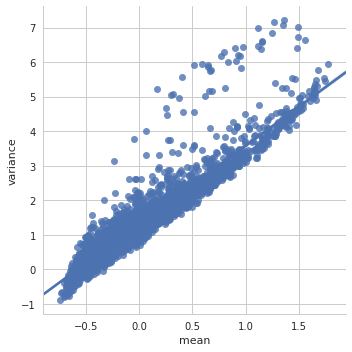

In [30]:
sns.set_style("whitegrid")

sns.lmplot('mean','variance',var_df)

We will use the stats module loaded from scipy to calculate the linear regression line for this data. Take a look at the result. It is a list of values.

In [38]:
result = stats.linregress(var_df['mean'], var_df['variance'])
result

LinregressResult(slope=2.2620875096404109, intercept=1.3146635312775878, rvalue=0.94405476724161963, pvalue=0.0, stderr=0.010800637264603929)

To grab the values we are interested in (slope and y intercept), select the values out of the list. The slope is stored in the first value (position 0) and yintercept is the second value (position 1). Print the values you found to make sure they match the result you see above. 

In [39]:
slope = result[0]
yint = result[1]
print(slope)
print(yint)

2.26208750964
1.31466353128


To determine which genes have a variation that is greater than we would expect, we first need to calculate what we expect for each gene. Back to simple algebra: y=mx+b

In [40]:
var_df['expected'] = var_df['mean']*slope + yint
var_df.head()

,variance,mean,expected
Mrpl15,2.145682,0.442836,2.316398
Lypla1,1.528257,0.033336,1.390073
Tcea1,-0.196641,-0.511350,0.157944
Atp6v1h,0.348399,-0.426418,0.350070
Rb1cc1,-0.076162,-0.596753,-0.035243


Let's grab genes with a variance >0.25 more than the expected value and plot these with a different color. We will create another column in the dataframe with a True/False result if the gene passes our criteria

In [41]:
var_df['sig'] = (var_df['variance'] - var_df['expected']) > 0.25
var_df.head()

,variance,mean,expected,sig
Mrpl15,2.145682,0.442836,2.316398,False
Lypla1,1.528257,0.033336,1.390073,False
Tcea1,-0.196641,-0.511350,0.157944,False
Atp6v1h,0.348399,-0.426418,0.350070,False
Rb1cc1,-0.076162,-0.596753,-0.035243,False


/home/ecwheele/anaconda2/envs/cshl-sca-2017/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


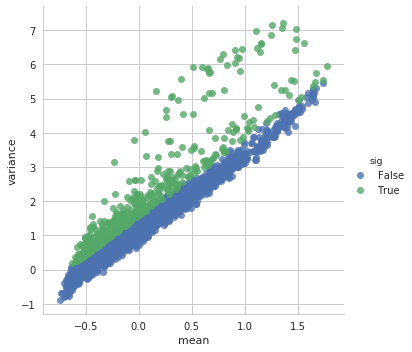

In [42]:
sns.lmplot('mean','variance',var_df, hue='sig', fit_reg=False)

Let's get a list of variable genes so we can subset the dataframe for only those genes. 

First, we will ask the question: which rows have a value in the column 'sig' == True:

In [44]:
(var_df['sig'] == True).head()

Mrpl15     False
Lypla1     False
Tcea1      False
Atp6v1h    False
Rb1cc1     False
Name: sig, dtype: bool

Look familiar? We have a boolean of True/False with gene names (dataframe index). Subset the counts dataframe with .loc

In [46]:
variable_scaled_counts = scaled_counts.loc[var_df['sig'] == True]
print(variable_scaled_counts.shape)
variable_scaled_counts.head()

(610, 1385)


,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,B1_AAACCGTGCCAAGT_Tuft,B1_AAACGCACAGCCTA_Goblet,B1_AAACGCACCAGATC_Endocrine,B1_AAACGCACCGCCTT_Stem,B1_AAACGCACCGTAGT_Stem,B1_AAACGGCTGATAGA_TA.Early,B1_AAACTTGAAGAGTA_Enterocyte.Mature.Proximal,B1_AAACTTGACCACAA_TA.G1,B1_AAAGACGATTGTCT_Enterocyte.Mature.Proximal,...,B1_TTTAGAGAACGGAG_Enterocyte.Immature.Distal,B1_TTTAGAGAGGAAAT_Stem,B1_TTTAGGCTCTCTTA_Paneth,B1_TTTCACGAAGTGTC_TA.Early,B1_TTTCACGACACACA_Enterocyte.Progenitor.Early,B1_TTTCACGAGAGGCA_Stem,B1_TTTCCAGAACGCTA_Goblet,B1_TTTCCAGATGCAAC_Enterocyte.Progenitor,B1_TTTCGAACTACTGG_Stem,B1_TTTCTACTTCACCC_Enterocyte.Progenitor.Late
Ptpn18,0.000000,0.0,0.0,3.717012,0.000000,0.000000,0.000000,0.000000,0.790389,0.000000,...,0.0,4.100882,0.0,0.0,0.0,0.0,0.0,0.000000,18.007203,0.0
Fam168b,3.401939,0.0,0.0,0.000000,1.534213,3.712871,1.809627,0.000000,0.000000,3.698225,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
Clk1,0.000000,0.0,0.0,0.000000,1.534213,1.237624,0.000000,0.000000,0.000000,7.396450,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,3.489184,0.000000,0.0
Raph1,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.163061,0.000000,0.0
Ino80d,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,2.054232,0.790389,0.000000,...,0.0,1.025220,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


**Convert scaled counts into z-scores**

Lastly, we will calculate the zscore of each gene across the rows to use as input for clustering and dimensionality reduction. 

In [48]:
stats.zscore(variable_scaled_counts, axis=1)

array([[-0.34005595, -0.34005595, -0.34005595, ..., -0.34005595,
         5.84003528, -0.34005595],
       [ 1.20931621, -0.33085488, -0.33085488, ..., -0.33085488,
        -0.33085488, -0.33085488],
       [-0.3055593 , -0.3055593 , -0.3055593 , ...,  1.60093025,
        -0.3055593 , -0.3055593 ],
       ..., 
       [-0.08677401, -0.44702861, -0.44702861, ..., -0.2006996 ,
         0.82424195, -0.44702861],
       [-0.22203749, -0.22203749, -0.22203749, ..., -0.22203749,
        -0.22203749, -0.22203749],
       [-0.27400436, -0.27400436, -0.27400436, ...,  0.38162679,
        -0.27400436, -0.27400436]])

The output of this is an array, so let's put this back into a dataframe with the appropriate row and column labels

In [49]:
zscore_array = stats.zscore(variable_scaled_counts, axis=1)

zscore_variable_genes = pd.DataFrame(zscore_array, index = variable_scaled_counts.index)
zscore_variable_genes.columns = variable_scaled_counts.columns
print(zscore_variable_genes.shape)
zscore_variable_genes.head()

(610, 1385)


,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,B1_AAACCGTGCCAAGT_Tuft,B1_AAACGCACAGCCTA_Goblet,B1_AAACGCACCAGATC_Endocrine,B1_AAACGCACCGCCTT_Stem,B1_AAACGCACCGTAGT_Stem,B1_AAACGGCTGATAGA_TA.Early,B1_AAACTTGAAGAGTA_Enterocyte.Mature.Proximal,B1_AAACTTGACCACAA_TA.G1,B1_AAAGACGATTGTCT_Enterocyte.Mature.Proximal,...,B1_TTTAGAGAACGGAG_Enterocyte.Immature.Distal,B1_TTTAGAGAGGAAAT_Stem,B1_TTTAGGCTCTCTTA_Paneth,B1_TTTCACGAAGTGTC_TA.Early,B1_TTTCACGACACACA_Enterocyte.Progenitor.Early,B1_TTTCACGAGAGGCA_Stem,B1_TTTCCAGAACGCTA_Goblet,B1_TTTCCAGATGCAAC_Enterocyte.Progenitor,B1_TTTCGAACTACTGG_Stem,B1_TTTCTACTTCACCC_Enterocyte.Progenitor.Late
Ptpn18,-0.340056,-0.340056,-0.340056,0.935626,-0.340056,-0.340056,-0.340056,-0.340056,-0.068794,-0.340056,...,-0.340056,1.067371,-0.340056,-0.340056,-0.340056,-0.340056,-0.340056,-0.340056,5.840035,-0.340056
Fam168b,1.209316,-0.330855,-0.330855,-0.330855,0.363734,1.350086,0.488424,-0.330855,-0.330855,1.343455,...,-0.330855,-0.330855,-0.330855,-0.330855,-0.330855,-0.330855,-0.330855,-0.330855,-0.330855,-0.330855
Clk1,-0.305559,-0.305559,-0.305559,-0.305559,0.532735,0.370678,-0.305559,-0.305559,-0.305559,3.735860,...,-0.305559,-0.305559,-0.305559,-0.305559,-0.305559,-0.305559,-0.305559,1.600930,-0.305559,-0.305559
Raph1,-0.266429,-0.266429,-0.266429,-0.266429,-0.266429,-0.266429,-0.266429,-0.266429,-0.266429,-0.266429,...,-0.266429,-0.266429,-0.266429,-0.266429,-0.266429,-0.266429,-0.266429,0.400700,-0.266429,-0.266429
Ino80d,-0.145690,-0.145690,-0.145690,-0.145690,-0.145690,-0.145690,-0.145690,0.684897,0.173887,-0.145690,...,-0.145690,0.268837,-0.145690,-0.145690,-0.145690,-0.145690,-0.145690,-0.145690,-0.145690,-0.145690


**Save this dataframe**

In [51]:
save_dir = "/home/ucsd-train02/projects/single_cell_intestine/results/"

zscore_variable_genes.to_csv(save_dir+"zscore_variable_genes.csv")